# Assignment 1 - Heart Disease Prediction

**Data Dictionary**

| Attribute       | Description                                                                                   |
|:-----------------|:-----------------------------------------------------------------------------------------------|
| Age             | Age of a patient [years]                                                                      |
| Sex             | Sex of the patient [M: Male, F: Female]                                                       |
| ChestPainType   | Chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic] |
| RestingBP       | Resting blood pressure [mm Hg]                                                                |
| Cholesterol     | Serum cholesterol [mm/dl]                                                                     |
| FastingBS       | Fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]                                |
| RestingECG      | Resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria] |
| MaxHR           | Maximum heart rate achieved [Numeric value between 60 and 202]                                 |
| ExerciseAngina  | Exercise-induced angina [Y: Yes, N: No]                                                       |
| Oldpeak         | ST depression induced by exercise relative to rest [Numeric value measured in depression]     |
| ST_Slope        | The slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]      |
| HeartDisease    | Output class [1: heart disease, 0: Normal]                                                     |


# Importing Libraries

**Importing all the necessary libraries used for visualization and modeling**

In [1]:
#libraries for Data Processing and Calculations
import pandas as pd 
import numpy as np 

# libraries for Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import plotly.express as px

#libraries for Machine learning models
from sklearn.preprocessing import StandardScaler #Standardization
from sklearn.model_selection import train_test_split, GridSearchCV #GridSearchCV: Decision Tree
from sklearn.metrics import accuracy_score ,confusion_matrix,classification_report, plot_roc_curve,roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# import warnings and filter warning 
import warnings
warnings.filterwarnings('ignore')

# Importing the Dataset

In [2]:
# importing the data file "heart.csv" and storing it as a dataframe df.
df = pd.read_csv('heart.csv')


In [3]:
# Head view of the data imported
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

# 1. Exploratory data analysis 

**a) Get a description, general information, data types, and shape of the dataset.**


In [4]:
# describing the dataset
df.describe()

Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

**Observation: The minimum value of the Oldpeak is a negative entry.**

In [5]:
# getting the categorical features
df.describe(include='object')

Sex ChestPainType RestingECG ExerciseAngina ST_Slope
count   918           918        918            918      918
unique    2             4          3              2        3
top       M           ASY     Normal              N     Flat
freq    725           496        552            547      460

**Observation: Chest Pain Type is Asymptomatic with having records of 496 out of 918 entries.**

In [6]:
# getting information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


**Observation: This dataset observed to have no null-values, 918 entries are found in all columns.**

In [7]:
# getting the data types present in the dataframe 
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

**Observation: In this dataset, we have 5 categorical features and 7 numeric features.**

In [8]:
#shape of the dataset
df.shape

(918, 12)

**Observation: The dataset has 918 rows and 12 columns in it.**

**b) Determine the frequency of distinct values for each feature in the dataset.**

In [9]:
#Display the distinct values for features
df.nunique() 

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

**Observation: Out Target Label has 2 distinct values 0 and 1.**

**c) Plot all features in the dataset to check distribution using a histogram.** 

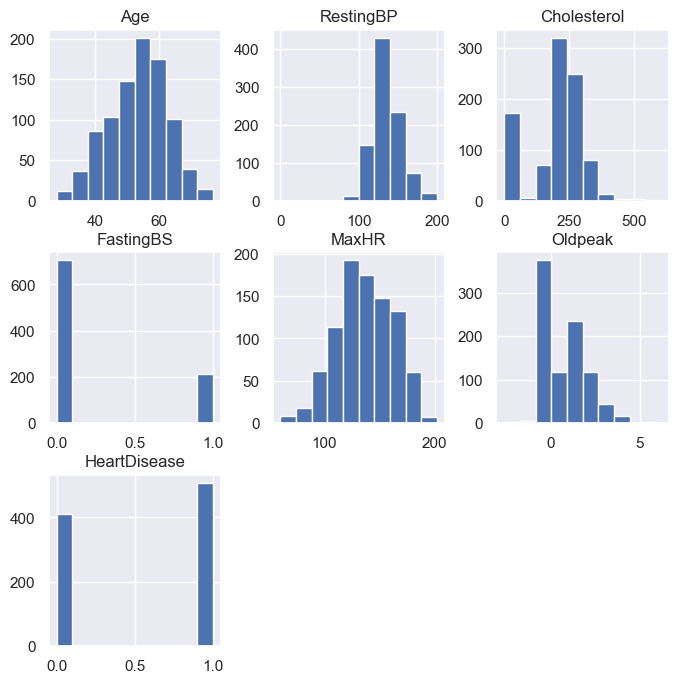

In [10]:
# displaying standard histogram with target variable.
sns.set()
df.hist(figsize=(8,8))
plt.show()

**Plotting all numeric features against our target label "HeartDisease" to figure out the relation between them.**

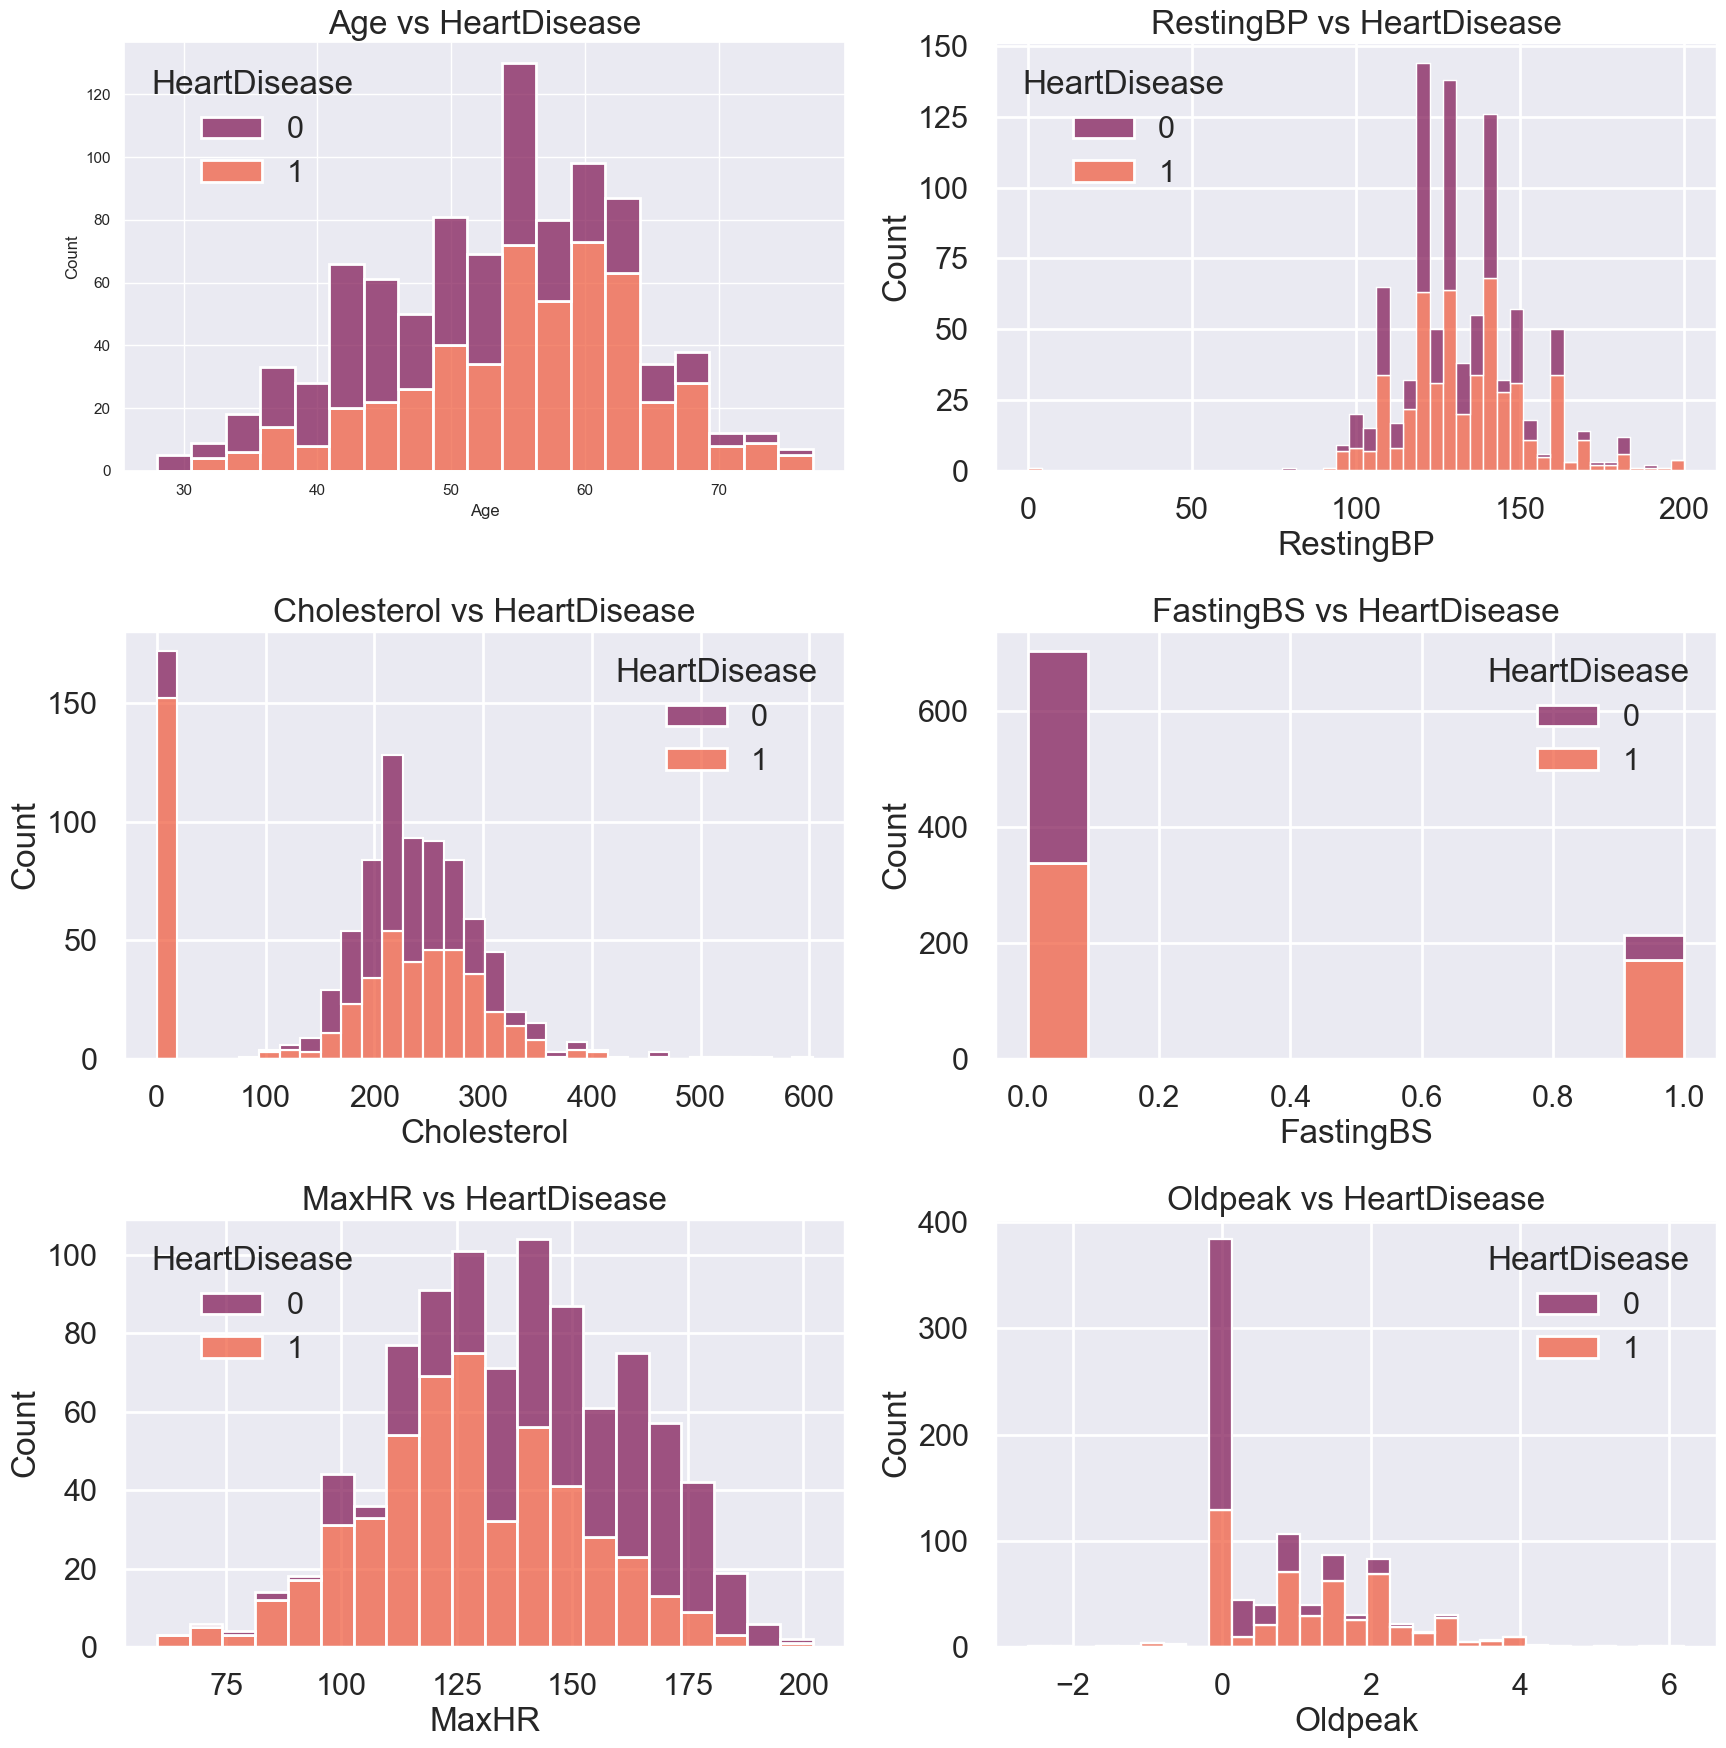

In [11]:
# visual plot size
plt.figure(figsize=(18,18))
# Age vs HeartDisease
plt.subplot(3,2,1)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('poster')
sns.histplot(data=df, x='Age', hue="HeartDisease",multiple="stack",palette='rocket')
plt.title('Age vs HeartDisease')

# RestingBP vs HeartDisease
plt.subplot(3,2,2)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('poster')
sns.histplot(data=df, x='RestingBP', hue="HeartDisease",multiple="stack",palette='rocket')
plt.title('RestingBP vs HeartDisease')

# Cholesterol vs HeartDisease
plt.subplot(3,2,3)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('poster')
sns.histplot(data=df, x='Cholesterol', hue="HeartDisease",multiple="stack",palette='rocket')
plt.title('Cholesterol vs HeartDisease')

# FastingBS vs HeartDisease
plt.subplot(3,2,4)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('poster')
sns.histplot(data=df, x='FastingBS', hue="HeartDisease",multiple="stack",palette='rocket')
plt.title('FastingBS vs HeartDisease')

# MaxHR vs HeartDisease
plt.subplot(3,2,5)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('poster')
sns.histplot(data=df, x='MaxHR', hue="HeartDisease",multiple="stack",palette='rocket')
plt.title('MaxHR vs HeartDisease')

# Oldpeak vs HeartDisease
plt.subplot(3,2,6)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('poster')
sns.histplot(data=df, x='Oldpeak', hue="HeartDisease",multiple="stack",palette='rocket')
plt.title('Oldpeak vs HeartDisease')
plt.show()

**Observation:**

- The person age increases the possibility of having a heart disease also increases.
- In Oldpeak, there is one number that is negative and may be an outlier.
- Heart illness is more likely when the heart rate is lower.

**d) Use a correlation matrix to check for correlation between predictor variables and
drop correlated features (> 0.5).** 

In [12]:
#determine the correlation matrix
df.corr()

Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
Age           1.000000   0.254399    -0.095282   0.198039 -0.382045  0.258612   
RestingBP     0.254399   1.000000     0.100893   0.070193 -0.112135  0.164803   
Cholesterol  -0.095282   0.100893     1.000000  -0.260974  0.235792  0.050148   
FastingBS     0.198039   0.070193    -0.260974   1.000000 -0.131438  0.052698   
MaxHR        -0.382045  -0.112135     0.235792  -0.131438  1.000000 -0.160691   
Oldpeak       0.258612   0.164803     0.050148   0.052698 -0.160691  1.000000   
HeartDisease  0.282039   0.107589    -0.232741   0.267291 -0.400421  0.403951   

              HeartDisease  
Age               0.282039  
RestingBP         0.107589  
Cholesterol      -0.232741  
FastingBS         0.267291  
MaxHR            -0.400421  
Oldpeak           0.403951  
HeartDisease      1.000000

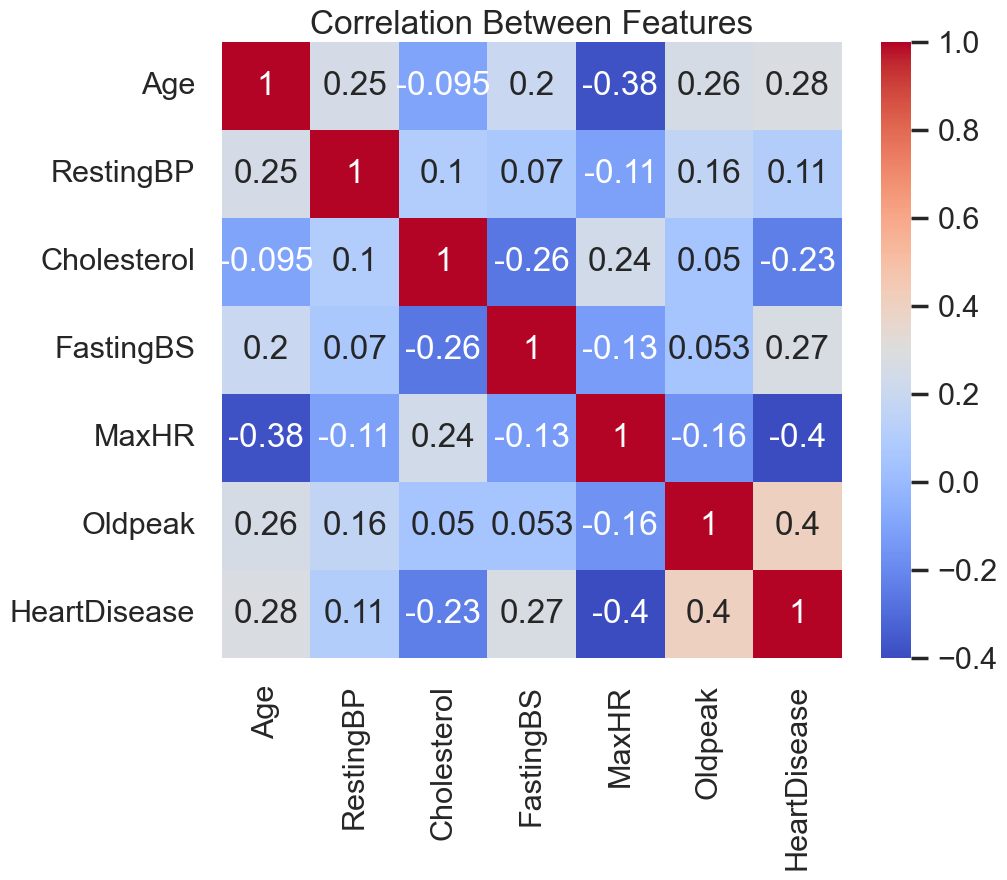

In [13]:
# visualizing the correlation with heat map
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap = 'coolwarm')
plt.title('Correlation Between Features')
plt.show()

**Observation: There are no features having correlation greater than 0.5. Hence, we will not drop any feature column.**

# 2. Feature Engineering 

**a) Check and drop duplicate and missing values, if it’s the case.** 

In [14]:
#Checking missing values
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

**Observation: There is no missing values in any of the features columns.**

In [15]:
#Checking duplicate values
df.duplicated().sum()

0

**Observation: There is no duplicate values present in the data.**

**b) Check and manage imbalance class, if needed.** 

In [16]:
#Checking the count of the target label
df.HeartDisease.value_counts() 

1    508
0    410
Name: HeartDisease, dtype: int64

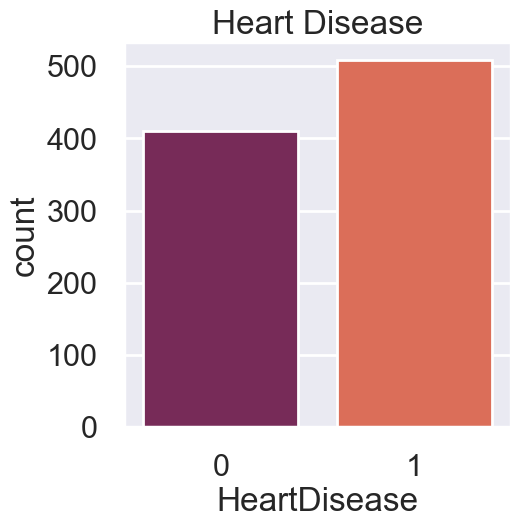

In [17]:
plt.figure(figsize=(5,5))
sns.countplot(x='HeartDisease',data=df,palette='rocket')
plt.title("Heart Disease")
plt.show()

**Observation: The count shown of 0 is 410 and 1 is 508. Their no imbalance found in the data.**

**c) Check (Use boxplots) and take care of outliers (e.g. Cholesterol, Oldpeak) by
completing imputation.** 

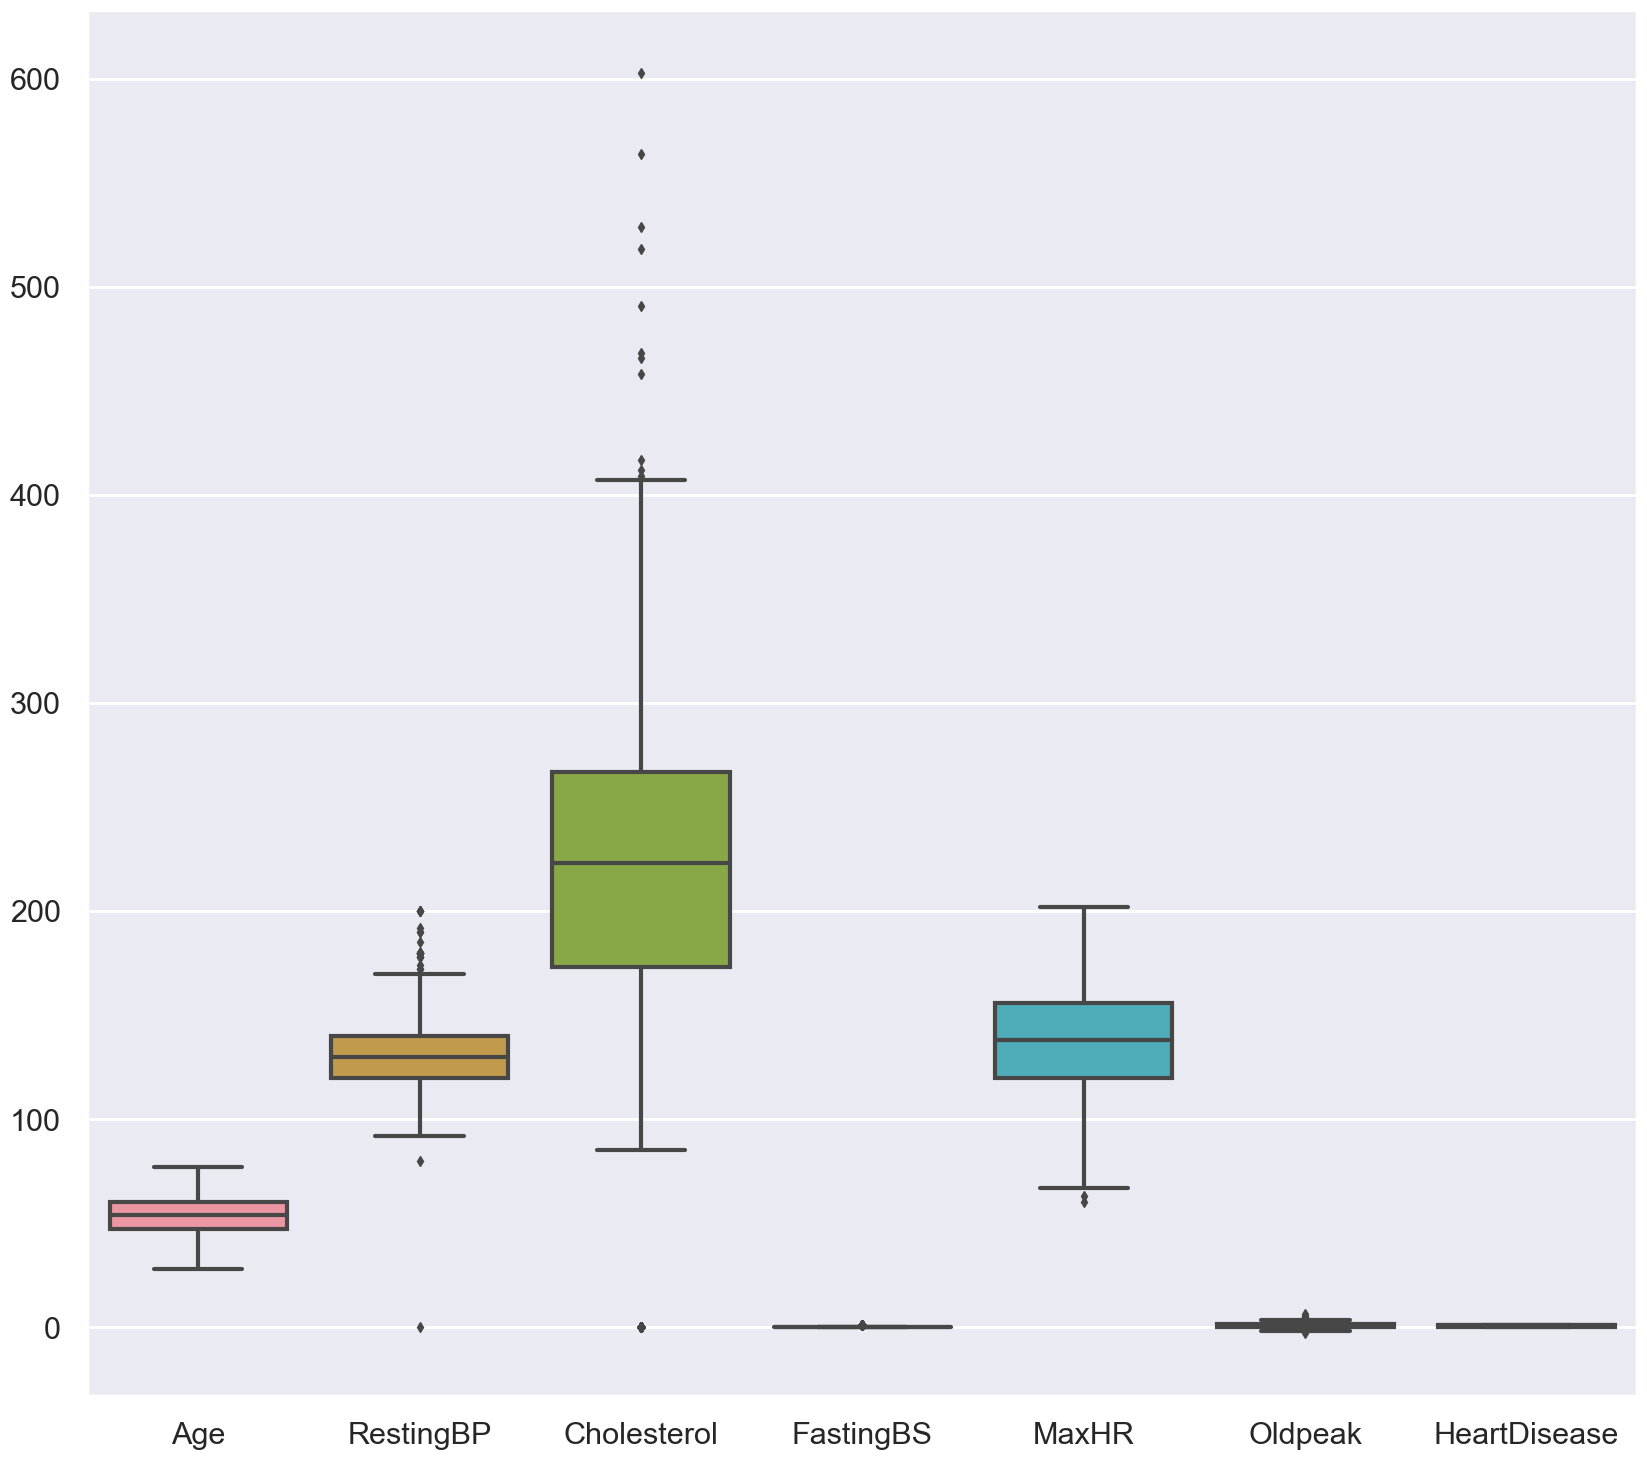

In [18]:
# boxplot of all the features
plt.figure(figsize=(20,18))
sns.boxplot(data = df)
plt.show()

In [19]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=3)

fig.add_trace(go.Box(x=df["Age"], name="Age"), row=1, col=1)
fig.add_trace(go.Box(x=df["RestingBP"], name="RestingBP"), row=1, col=2)
fig.add_trace(go.Box(x=df["Cholesterol"], name="Cholesterol"), row=1, col=3)
fig.add_trace(go.Box(x=df["FastingBS"], name="FastingBS"), row=2, col=1)
fig.add_trace(go.Box(x=df["MaxHR"], name="MaxHR"), row=2, col=2)
fig.add_trace(go.Box(x=df["Oldpeak"], name="Oldpeak"), row=2, col=3)

fig.show()


In [20]:
# Exactly detecting outliers

def outliers_detection(df_column):
   
    Q3, Q1 = np.percentile(df_column, [75 ,25]) 
    IQR = Q3 - Q1
    print('Q1: ',Q1)
    print('Q3: ',Q3)
    print('Inter Quartile Range: ',IQR)
    print('Outliers lie before', Q1-1.5*IQR, 'and beyond', Q3+1.5*IQR)
    print('Number of Rows with Left Extreme Outliers:', len(df[df_column <Q1-1.5*IQR]))
    print('Number of Rows with Right Extreme Outliers:', len(df[df_column>Q3+1.5*IQR]))
    print('=' *45)

In [21]:
numeric_col=df.describe().columns.to_list()
for column in numeric_col:
    if (column == 'HeartDisease'):
        break
    else:
        outliers_detection(df[column])

Q1:  47.0
Q3:  60.0
Inter Quartile Range:  13.0
Outliers lie before 27.5 and beyond 79.5
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 0
Q1:  120.0
Q3:  140.0
Inter Quartile Range:  20.0
Outliers lie before 90.0 and beyond 170.0
Number of Rows with Left Extreme Outliers: 2
Number of Rows with Right Extreme Outliers: 26
Q1:  173.25
Q3:  267.0
Inter Quartile Range:  93.75
Outliers lie before 32.625 and beyond 407.625
Number of Rows with Left Extreme Outliers: 172
Number of Rows with Right Extreme Outliers: 11
Q1:  0.0
Q3:  0.0
Inter Quartile Range:  0.0
Outliers lie before 0.0 and beyond 0.0
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 214
Q1:  120.0
Q3:  156.0
Inter Quartile Range:  36.0
Outliers lie before 66.0 and beyond 210.0
Number of Rows with Left Extreme Outliers: 2
Number of Rows with Right Extreme Outliers: 0
Q1:  0.0
Q3:  1.5
Inter Quartile Range:  1.5
Outliers lie before -2.25 and beyond 3.

**Observation:**
* Age: No outliers were detected.
* RestingBP: Both lower and upper fences contain some outliers.
* Cholesterol: Some outliers are present on both sides of the lower and upper fences.
* FastingBS: As all values are 0 and 1, they cannot be treated as outliers.
* MaxHR: There are two outliers present on the left side of the lower fence.
* Oldpeak: There is a significant outlier present on the left side of the lower fence and a few on the right side of the upper fence.

In [22]:
#dropping outlier from RestingBP

df = df[df['RestingBP'] >= 90]


In [23]:
#checking the shape of the data after dropping
df.shape

(916, 12)

In [24]:
#dropping outlier from MaxHR
df = df[df['MaxHR'] >=66]
df.shape

(914, 12)

In [25]:
#dropping outlier from Oldpeak
df = df[df['Oldpeak'] >=-2.25] 
df.shape

(913, 12)

In [26]:
#dropping outlier from Cholesterol
df = df[df['Cholesterol'] <=430]
df.shape

(905, 12)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 905 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             905 non-null    int64  
 1   Sex             905 non-null    object 
 2   ChestPainType   905 non-null    object 
 3   RestingBP       905 non-null    int64  
 4   Cholesterol     905 non-null    int64  
 5   FastingBS       905 non-null    int64  
 6   RestingECG      905 non-null    object 
 7   MaxHR           905 non-null    int64  
 8   ExerciseAngina  905 non-null    object 
 9   Oldpeak         905 non-null    float64
 10  ST_Slope        905 non-null    object 
 11  HeartDisease    905 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 91.9+ KB


**d) Convert categorical data into numerical data using one-hot encoding or any other label encoding approach.**

**One-hot Encoding**

In [28]:
#DataFrame using pandas' get_dummies() ' function
df = pd.get_dummies(df, columns=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'], drop_first=True)
df.head()

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0   40        140          289          0    172      0.0             0   
1   49        160          180          0    156      1.0             1   
2   37        130          283          0     98      0.0             0   
3   48        138          214          0    108      1.5             1   
4   54        150          195          0    122      0.0             0   

   Sex_M  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
0      1                  1                  0                 0   
1      0                  0                  1                 0   
2      1                  1                  0                 0   
3      0                  0                  0                 0   
4      1                  0                  1                 0   

   RestingECG_Normal  RestingECG_ST  ExerciseAngina_Y  ST_Slope_Flat  \
0                  1              0                 0              0   
1                  1              0                 0              1   
2                  0              1                 0              0   
3                  1              0                 1              1   
4                  1              0                 0              0   

   ST_Slope_Up  
0            1  
1            0  
2            1  
3            0  
4            1

**e) Rescale features to a narrow range using a normalization or standardization function.**

In [29]:
#StandardScaler() class from scikit-learn 
scaler= StandardScaler()
 
# Splitting the features and target label
df_features = df.drop('HeartDisease',axis = 1)
df_target = pd.DataFrame(df['HeartDisease'])
 
# standardization of data
object = scaler.fit_transform(df_features) 
scale = pd.DataFrame(object,columns=df_features.columns)
scale.head()

Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak     Sex_M  \
0 -1.435646   0.407661     0.875411  -0.549689  1.385026 -0.839670  0.517211   
1 -0.481633   1.521758    -0.163208  -0.549689  0.751351  0.100104 -1.933448   
2 -1.753650  -0.149387     0.818239  -0.549689 -1.545720 -0.839670  0.517211   
3 -0.587634   0.296251     0.160765  -0.549689 -1.149673  0.569991 -1.933448   
4  0.048374   0.964710    -0.020279  -0.549689 -0.595208 -0.839670  0.517211   

   ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  RestingECG_Normal  \
0           2.064371          -0.532624          -0.23141           0.820261   
1          -0.484409           1.877498          -0.23141           0.820261   
2           2.064371          -0.532624          -0.23141          -1.219124   
3          -0.484409          -0.532624          -0.23141           0.820261   
4          -0.484409           1.877498          -0.23141           0.820261   

   RestingECG_ST  ExerciseAngina_Y  ST_Slope_Flat  ST_Slope_Up  
0      -0.493084         -0.825927      -0.996691     1.141402  
1      -0.493084         -0.825927       1.003320    -0.876115  
2       2.028052         -0.825927      -0.996691     1.141402  
3      -0.493084          1.210760       1.003320    -0.876115  
4      -0.493084         -0.825927      -0.996691     1.141402

# Modeling

**a) Partition your data in test (30%) and training (70%).**

In [30]:
#train_test_split function is used to split the data 

test_size = 0.3

x_train, x_test, y_train, y_test = train_test_split(scale,df_target,test_size=test_size,random_state=42)

In [31]:
x_test.shape, y_test.shape

((272, 15), (272, 1))

In [32]:
x_train.shape,y_train.shape

((633, 15), (633, 1))

**b) Use KNN, SVM, and Decision Tree Classifier classifiers to predict the class.**

**1. K-Nearest Neighbours (KNN)**

KNN Score: 0.7757352941176471
KNN Accuracy: 0.7757352941176471
__________________________________________________


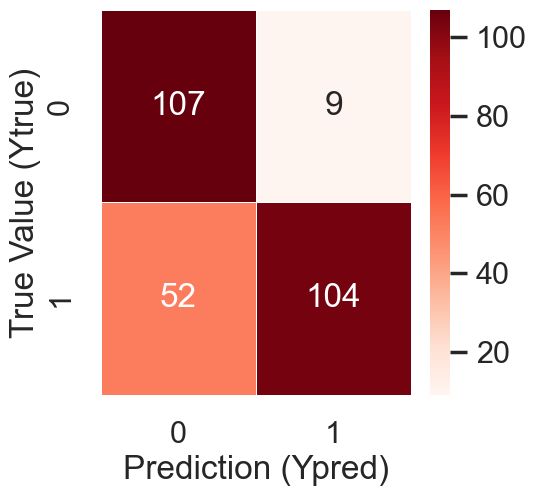

__________________________________________________

 Classification Report 
 
               precision    recall  f1-score   support

           0       0.67      0.92      0.78       116
           1       0.92      0.67      0.77       156

    accuracy                           0.78       272
   macro avg       0.80      0.79      0.78       272
weighted avg       0.81      0.78      0.78       272



In [33]:
#K-Nearest Neighbours (KNN)

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)
knn_y_predict = knn.predict(x_test) #test data
knn_cm = confusion_matrix(y_test, knn_y_predict) #confusion matrix
knn_acc = accuracy_score(y_test, knn_y_predict) #accuracy
knn_score = knn.score(x_test, y_test)

print("KNN Score:",knn_score)
print("KNN Accuracy:",knn_acc)
print("_"*50)
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(knn_cm, annot=True, linewidths=0.5,fmt=".0f", ax=ax, cmap='Reds')
ax.set_xlabel("Prediction (Ypred)")
ax.set_ylabel("True Value (Ytrue)")
plt.show()
print("_"*50)
#Classification Report
knn_class_report = classification_report(y_test, knn_y_predict)
print('\n Classification Report \n \n', knn_class_report)

**Observation: KNN model has given an accuracy of 77 percent**

**2. Support Vector Machine (SVM)**

In [34]:
SVM = SVC(random_state=42)
#Cross validation
from sklearn.model_selection import cross_val_score
svm_acc = cross_val_score(estimator = SVM, X= x_train, y= y_train, cv=5)    # into 5 folds
print("Average Accuracies: ",np.mean(svm_acc))
print("Standart Deviation Accuracies: ",np.std(svm_acc))

Average Accuracies:  0.8482689663792025
Standart Deviation Accuracies:  0.024087832717219544


SVM Accuracy: 0.9117647058823529
__________________________________________________


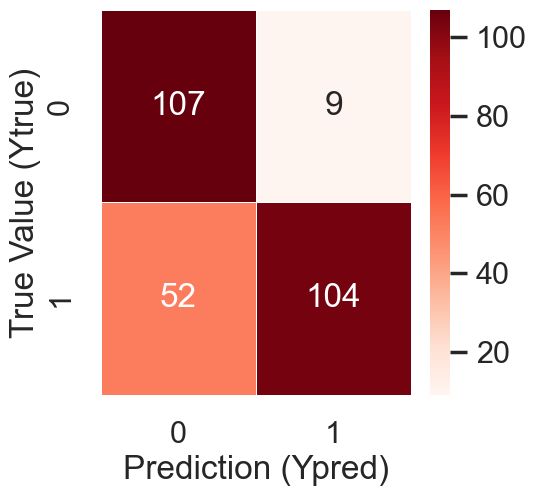

__________________________________________________

 Classification Report 
 
               precision    recall  f1-score   support

           0       0.88      0.92      0.90       116
           1       0.94      0.90      0.92       156

    accuracy                           0.91       272
   macro avg       0.91      0.91      0.91       272
weighted avg       0.91      0.91      0.91       272



In [35]:
SVM.fit(x_train,y_train)  #training
#Testing
print ("SVM Accuracy:", SVM.score(x_test,y_test))
SVM_score = SVM.score(x_test,y_test)
print("_"*50)

#Confusion Matrix for SVM
svmy_predict= SVM.predict(x_test)
svmy_true = y_test
svmCM = confusion_matrix(svmy_true,svmy_predict)

fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(knn_cm, annot=True, linewidths=0.5,fmt=".0f", ax=ax, cmap='Reds')
ax.set_xlabel("Prediction (Ypred)")
ax.set_ylabel("True Value (Ytrue)")
plt.show()
print("_"*50)

#Classification Report for SVM
svm_class_report = classification_report(svmy_true,svmy_predict)
print('\n Classification Report \n \n', svm_class_report)


**Observation: SVM model has given an accuracy of 91 percent**

**Decision Tree**

In [36]:
DTC = DecisionTreeClassifier()
#K-fold CV
from sklearn.model_selection import cross_val_score
dt_acc = cross_val_score(estimator = DTC, X= x_train, y=y_train, cv=5)
print("Average Accuracies: ",np.mean(dt_acc))
print("Standart Deviation Accuracies: ",np.std(dt_acc))


Average Accuracies:  0.7519810023747031
Standart Deviation Accuracies:  0.03287641279826567


Decision Tree Score:  0.7867647058823529
__________________________________________________


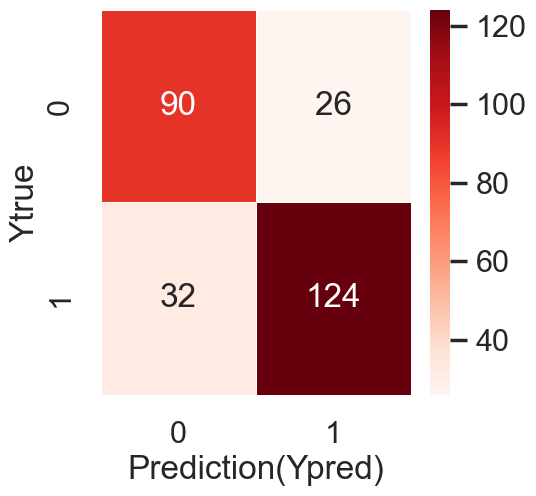

__________________________________________________

 Classification Report 
 
               precision    recall  f1-score   support

           0       0.74      0.78      0.76       116
           1       0.83      0.79      0.81       156

    accuracy                           0.79       272
   macro avg       0.78      0.79      0.78       272
weighted avg       0.79      0.79      0.79       272



In [37]:
DTC.fit(x_train,y_train) #training
print("Decision Tree Score: ",DTC.score(x_test,y_test))
DTC_score = DTC.score(x_test,y_test)
print("_"*50)
#Confusion Matrix for DTC
dt_ypredict= DTC.predict(x_test)
dt_ytrue = y_test

dt_cm = confusion_matrix(dt_ytrue,dt_ypredict)

fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(dt_cm,annot = True, linewidths=0.5,fmt=".0f",ax=ax,cmap='Reds')
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()
print("_"*50)

#Classification Report for DTC
dt_class_report = classification_report(dt_ytrue,dt_ypredict)
print('\n Classification Report \n \n', dt_class_report)

# Model evaluation and Selection

**a) Using the function GridSearchCV find the best estimators (criterion, max_depth, 
min_samples_leaf) for your DT model.** 

In [38]:
parameter={
    "criterion":["gini","entropy"],
    "max_depth":list(range(2,20)),
    "min_samples_leaf":list(range(5,20))
}

In [39]:
grid=GridSearchCV(DecisionTreeClassifier(),parameter,verbose=2)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=7; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                              15, 16, 17, 18, 19]},
             verbose=2)

**b) Using the best parameters for the DT run the model and get the prediction.**

In [40]:
grid.best_score_

0.8246344206974128

**c) Compare the results of the models based on the metrics: precision, recall, 
accuracy, F-measure from steps 3.b and 4.b.** 

In [41]:
print('\n Classification Report For KNN \n \n', knn_class_report)
print('=' * 75)
print('\n Classification Report For SVM (Linear) \n \n', svm_class_report)
print('=' * 75)
print('\n Classification Report For Decision Tree before tunning \n \n', dt_class_report)



 Classification Report For KNN 
 
               precision    recall  f1-score   support

           0       0.67      0.92      0.78       116
           1       0.92      0.67      0.77       156

    accuracy                           0.78       272
   macro avg       0.80      0.79      0.78       272
weighted avg       0.81      0.78      0.78       272


 Classification Report For SVM (Linear) 
 
               precision    recall  f1-score   support

           0       0.88      0.92      0.90       116
           1       0.94      0.90      0.92       156

    accuracy                           0.91       272
   macro avg       0.91      0.91      0.91       272
weighted avg       0.91      0.91      0.91       272


 Classification Report For Decision Tree before tunning 
 
               precision    recall  f1-score   support

           0       0.74      0.78      0.76       116
           1       0.83      0.79      0.81       156

    accuracy                           0

**Observation:**

The accuracy results of four machine learning models are as follows:
- KNN Accuracy: 78%
- SVM Accuracy: 91%
- Decision Tree Accuracy: 78%
- Decision Tree Accuracy after GridSearch: 82%

Upon comparing the classification reports of all three models, it can be concluded that the SVM model is the most suitable for this problem due to its highest accuracy of 91%.


**d) Plot the ROC graph for each model and compare the performance for each one 
(3.b and 4.b)** 

**KNN ROC Graph**

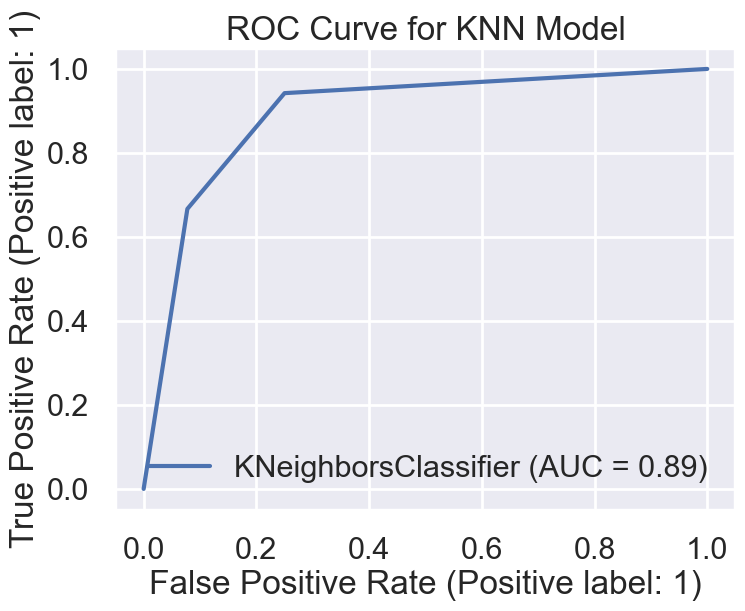

In [42]:
fig, ax = plt.subplots(figsize=(8, 6))
plot_roc_curve(knn, x_test, y_test, ax=ax)
ax.set_title('ROC Curve for KNN Model')
plt.show()


**SVM ROC Graph**

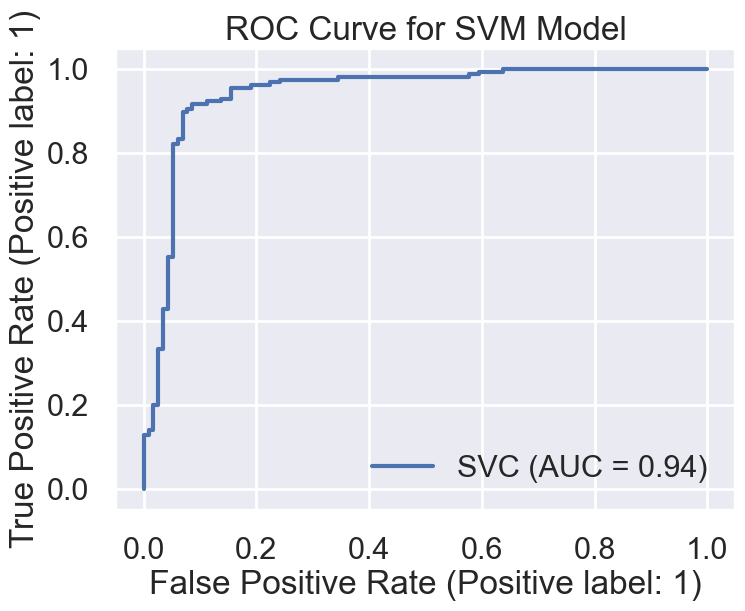

In [43]:
fig, ax = plt.subplots(figsize=(8, 6))
plot_roc_curve(SVM,x_test, y_test, ax=ax)
ax.set_title('ROC Curve for SVM Model')
plt.show()


**Decision Tree ROC Graph**

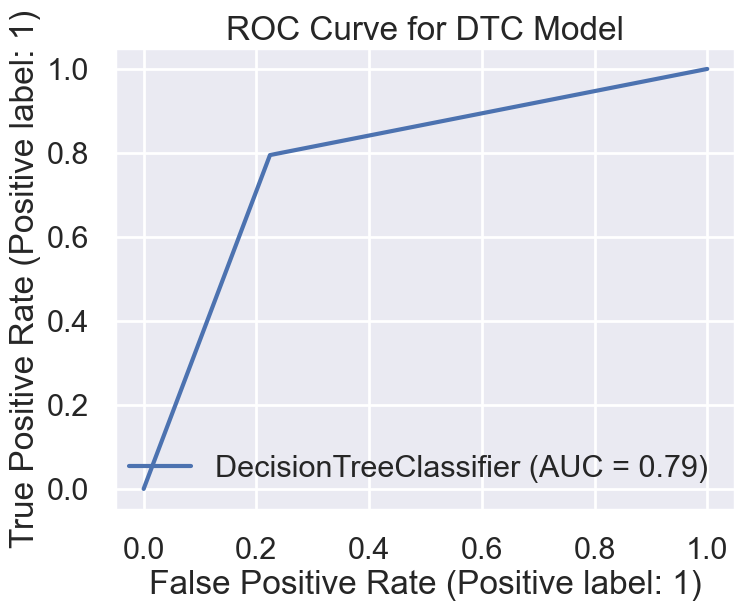

In [44]:
fig, ax = plt.subplots(figsize=(8, 6))
plot_roc_curve(DTC, x_test, y_test, ax=ax)
ax.set_title('ROC Curve for DTC Model')
plt.show()

**e) Explain which is the best model according to each criterion from 4.c) and 4.d).** 

**Observation:**

The accuracy results and ROC AUC scores of three machine learning models for forecasting the presence of heart disease are as follows:

- KNN Accuracy: 78%, ROC AUC: 0.89
- SVM Accuracy: 91%, ROC AUC: 0.94
- Decision Tree Accuracy: 78%, ROC AUC: 0.78
- Decision Tree Accuracy after GridSearch: 82%

After comparing the classification reports and ROC AUC scores of all three models, it can be concluded that the SVM model is the most suitable for forecasting the presence of heart disease due to its highest accuracy of 91% and ROC AUC score of 0.94.



Conclusion: In this project, we explored the performance of three machine learning models - KNN, SVM, and DTC - for predicting the presence of heart disease based on a given set of features. We used classification accuracy and ROC AUC score as performance metrics for these models. After comparing the classification reports and ROC AUC scores of all three models, we found that SVM outperformed the other models, achieving an accuracy of 91% and an ROC AUC score of 0.94. This indicates that SVM is the most suitable model for predicting the presence of heart disease in this dataset. Overall, this project demonstrates the potential of machine learning algorithms for accurate and efficient diagnosis of heart disease, which can contribute to the development of more effective healthcare strategies and treatment plans.